* Author: Harshit Shambharkar
* Roll No.- ME21BTECH11019

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Defining parameters
L = 1
# we are considering uniform grid only
nx = 21
ny = 21
# nx = ny

x = np.linspace(0, L, nx, endpoint=True)
y = np.linspace(0, L, ny, endpoint=True)

dx = y[1] - y[0]
dy = x[1] - x[0]
#print(dx)
# dx = dy
beta = (dx / dy)
Tolerance = 1e-4

# We have normalised the governing equation and then proceeding

                                    Gauss Siedel Method

In [3]:
# Initialising the grid of temperature
T_gs = np.zeros((nx, ny))

# Initialising Drichlet boundary conditions
T_gs[nx-1, :] = 0
T_gs[:, ny-1] = 0

T_gs_old = np.copy(T_gs)

#to keep track of number of iterations
iterations = 0
Error = 2

while Error > Tolerance:
    for i in range(1,nx-1):
        
        for j in range(1, ny-1):
    
                T_gs[i, j] = 0.5*(dx**2 + T_gs_old[i+1,j] + T_gs[i-1, j] + (beta**2)*T_gs_old[i, j+1] + (beta**2)*T_gs[i, j-1]) / (1 + beta**2)
    # Initialising newmann boundary conditions
    T_gs[1:,0] = T_gs[1:,1]
    T_gs[0, :ny-1] = T_gs[1, :ny-1]
    
    Error = np.max(np.max(np.abs(T_gs - T_gs_old)))
    iterations = iterations + 1
    T_gs_old = np.copy(T_gs)
    #plt.contour(x,y, theta)
print("No. of iterations in Gauss siedel Method : ", iterations)

No. of iterations in Gauss siedel Method :  490


Text(0, 0.5, 'Along Y')

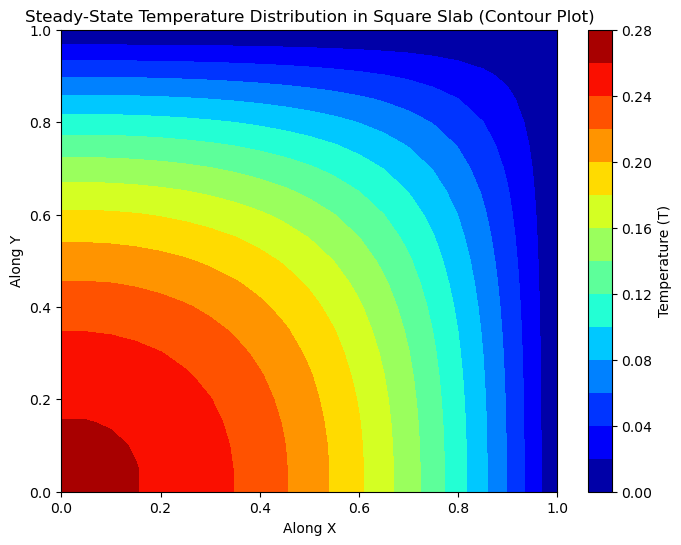

In [4]:
# plotting contours
plt.figure(figsize=(8,6))
X, Y = np.meshgrid(x,y)
contour = plt.contourf(X, Y, T_gs, levels=15, cmap=plt.cm.jet)
plt.colorbar(contour, label='Temperature (T)')
plt.title('Steady-State Temperature Distribution in Square Slab (Contour Plot)')
plt.xlabel("Along X")
plt.ylabel("Along Y")

                                   Centre Line Temperature Distribution along X

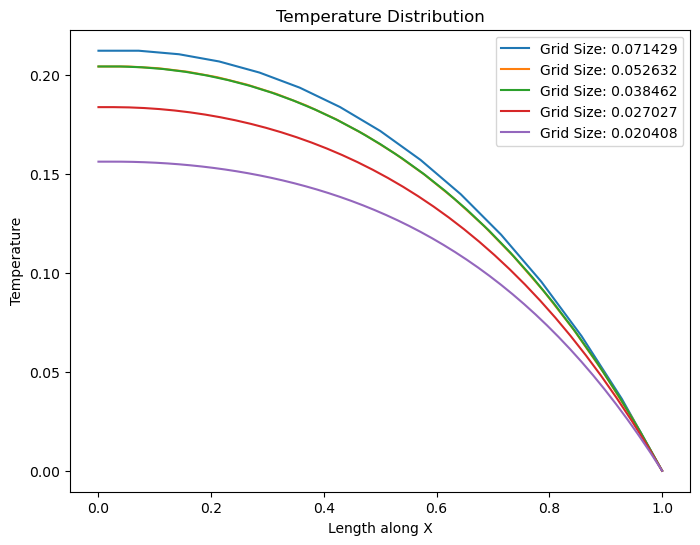

In [5]:
def gauss_siedel(n): # Initialising the grid of temperature
    T_gs = np.zeros((n, n))
    dx = 1/(n-1)
    dy = 1/(n-1)
    beta = (dx/dy)
    
    # Initialising Drichlet boundary conditions
    T_gs[n-1, :] = 0
    T_gs[:, n-1] = 0
    T_gs_old = np.copy(T_gs)

    #to keep track of number of iterations
    iterations = 0
    Error = 2

    while Error > Tolerance:
        for i in range(1,n-1):

            for j in range(1, n-1):

                    T_gs[i, j] = 0.5*(dx**2 + T_gs_old[i+1,j] + T_gs[i-1, j] + (beta**2)*T_gs_old[i, j+1] + (beta**2)*T_gs[i, j-1]) / (1 + beta**2)
        # Initialising newmann boundary conditions
        T_gs[1:,0] = T_gs[1:,1]
        T_gs[0, :n-1] = T_gs[1, :n-1]

        Error = np.max(np.max(np.abs(T_gs - T_gs_old)))
        iterations = iterations + 1
        T_gs_old = np.copy(T_gs)
        #plt.contour(x,y, theta)
        
    return T_gs
    

grid_points = [15, 20, 27, 38, 50]
plt.figure(figsize=(8,6))
for gp in grid_points:
    T_plot = gauss_siedel(gp)
    T_mid_x = T_plot[gp//2,:]
    x_t = np.linspace(0, L, gp, endpoint=True)
    h = x_t[1] - x_t[0]
    
    plt.plot(x_t, T_mid_x, label=f'Grid Size: {h:.6f}')
    plt.ylabel('Temperature')
    plt.xlabel('Length along X')
    plt.title('Temperature Distribution')
    plt.legend()

                           Comparison of Centre line Temperature Distribution Along Y

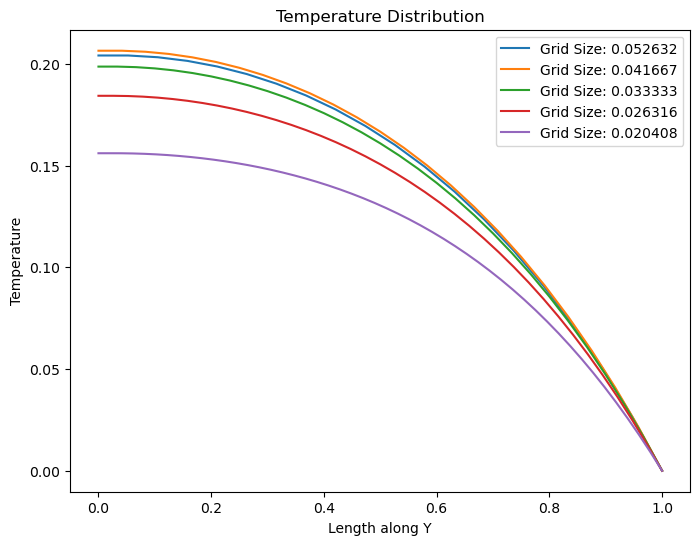

In [6]:
grid_points = [20, 25, 31, 39, 50]
plt.figure(figsize=(8,6))

for gp in grid_points:
    T_plot = gauss_siedel(gp)
    T_mid_y = T_plot[:,gp//2]
    y_t = np.linspace(0, L, gp, endpoint=True)
    h = y_t[1] - y_t[0]
   
    plt.plot(y_t, T_mid_y, label=f'Grid Size: {h:.6f}')
    plt.ylabel('Temperature')
    plt.xlabel('Length along Y')
    plt.title('Temperature Distribution')
    plt.legend()

                                Gauss Siedel with Successive Over Relaxation

In [7]:
T_sor = np.zeros((nx, ny))

T_sor[nx-1, :] = 0
T_sor[:, ny-1] = 0

T_sor_old = np.copy(T_sor)
     
iterations = 0
Error = 1
alpha = 1.8 # Relaxation Parameter, alpha > 1 for over relaxation

while Error > Tolerance:
    for i in range(1,nx-1):
        for j in range(1, ny-1):
            T_sor[i, j] = (1 - alpha)*T_sor_old[i,j] + (alpha*0.5*(dx**2 + T_sor_old[i+1,j] + T_sor[i-1, j] + (beta**2)*T_sor_old[i, j+1] + (beta**2)*T_sor[i, j-1])) / (1 + beta**2)
            
    T_sor[1:,0] = T_sor[1:,1]
    T_sor[0,:ny-1] = T_sor[1,:ny-1]
#     print(theta)
    
    Error = np.max(np.max(np.abs(T_sor - T_sor_old)))
    iterations = iterations + 1
    T_sor_old = np.copy(T_sor)
    
    #plt.contour(x,y, theta)
print("No. of iterations in Gauss siedel Method with SOR : ", iterations)

No. of iterations in Gauss siedel Method with SOR :  129


                                    Gauss Method with Under Relaxation

In [8]:
T_ur = np.zeros((nx, ny))

T_ur[nx-1, :] = 0
T_ur[:, ny-1] = 0

T_ur_old = np.copy(T_ur)
     
iterations = 0
Error = 1
alpha = 0.6 # Relaxation Parameter, alpha < 1 for under relaxation

while Error > Tolerance:
    for i in range(1,nx-1):
        for j in range(1, ny-1):
            T_ur[i, j] = (1 - alpha)*T_ur_old[i,j] + (alpha*0.5*(dx**2 + T_ur_old[i+1,j] + T_ur[i-1, j] + (beta**2)*T_ur_old[i, j+1] + (beta**2)*T_ur[i, j-1])) / (1 + beta**2)
            
    T_ur[1:,0] = T_ur[1:,1]
    T_ur[0,:ny-1] = T_ur[1,:ny-1]
#     print(theta)
    
    Error = np.max(np.max(np.abs(T_ur - T_ur_old)))
    iterations = iterations + 1
    T_ur_old = np.copy(T_ur)
    
    #plt.contour(x,y, theta)
print("No. of iterations in Gauss siedel Method with Under Relaxation: ", iterations)

No. of iterations in Gauss siedel Method with Under Relaxation:  796


                                    Line by Line Gauss Siedel Method

In [9]:
# We are sweeping in the x direction
#Assume two known in y-direction 
# Use TDMA to solve the generated tridiagonal matrix

T_ll = np.zeros((nx, ny))

# Initialising drichlet boundary condition
T_ll[nx-1, :] = 0
T_ll[:, ny-1] = 0
T_ll_old = np.copy(T_ll)
     
iterations = 0
Error = 1

while Error > Tolerance:
    for i in range(1,nx-1):
        # Using TDMA
        T_tdma = np.zeros(ny)
        T_tdma[ny-1] = 0

        P = np.zeros(ny)
        Q = np.zeros(ny)

        a, b, c, = 2*(1 + beta**2), 1, 1

        P[0] = 1
        Q[0] = 0
        d = np.zeros(ny)
        
        for k in range(ny):
            d[k] = dx**2 + (beta**2)*T_ll[i-1,k] + (beta**2)*T_ll[i+1,k]

        for j in range(1,ny-1):
            P[j] = b / (a - c*P[j-1])
            Q[j] = (d[j] + c*Q[j-1]) / (a - c*P[j-1])

        Q[ny-1] = T_tdma[ny-1]

        for j in range(ny-2,-1, -1):
            T_tdma[j] = T_tdma[j+1]*P[j] + Q[j]
            
        T_ll[i,:] = T_tdma

        
    T_ll[0,:] = T_ll[1,:]
    Error = np.max(np.max(np.abs(T_ll - T_ll_old)))
    iterations = iterations + 1
    T_ll_old = np.copy(T_ll)
    
    #plt.contour(x,y, theta)
print("No. of iterations in Line by Line Gauss siedel Method : ", iterations)

No. of iterations in Line by Line Gauss siedel Method :  302


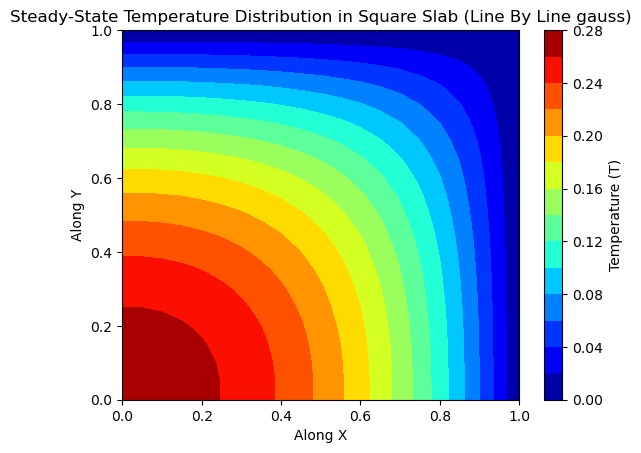

In [10]:
# plotting contours
contour = plt.contourf(X, Y, T_ll, levels=15, cmap=plt.cm.jet)
plt.colorbar(contour, label='Temperature (T)')
plt.title('Steady-State Temperature Distribution in Square Slab (Line By Line gauss)')
plt.xlabel("Along X")
plt.ylabel("Along Y")
plt.show()